In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile
import sqlite3

In [3]:
zip_file_path = '../../data/im.db.zip'
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the contents of the zip file
    zip_ref.extractall()

In [4]:
conn = sqlite3.connect('im.db')

In [5]:
cursor = conn.cursor()

In [6]:
movie_ratings_table = """
SELECT *
FROM movie_ratings
;"""
pd.read_sql(movie_ratings_table, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
q = """
SELECT *
FROM movie_basics
;"""
movie_runtime_data = pd.read_sql(q, conn)
movie_runtime_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
movie_gross = pd.read_csv("../../data/bom.movie_gross.csv.gz")

In [9]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
movie_gross.rename(columns={'title':'movie'}, inplace= True)

In [11]:
movie_info_df = pd.read_csv('../../data/rt.movie_info.tsv.gz', sep ='\t')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [13]:
reviews_df = pd.read_csv('../../data/rt.reviews.tsv.gz', delimiter='\t', encoding='latin1')
reviews_df.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [14]:
movies_df = pd.read_csv('../../data/tmdb.movies.csv.gz', encoding='latin1', index_col=0)
movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [15]:
movies_df.rename(columns={'title':'movie'}, inplace= True)

In [16]:
movie_budgets_df = pd.read_csv('../../data/tn.movie_budgets.csv.gz', encoding='latin1')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
mergedProf = pd.merge(movie_gross,movie_budgets_df, on = 'movie')


In [18]:
mergedProf.head(5)  

,movie,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [19]:
 mergedProf['worldwide_gross'] = mergedProf['worldwide_gross'].str.replace("$","").str.replace(",","").astype(int)

In [20]:
 mergedProf['production_budget'] = mergedProf['production_budget'].str.replace("$","").str.replace(",","").astype(int)

In [21]:
mergedProf['Profit'] = mergedProf['worldwide_gross'] - mergedProf['production_budget']
mergedProf = mergedProf.drop('domestic_gross_x', axis =1)

In [22]:

mergedProf = mergedProf.drop('domestic_gross_y', axis =1)

mergedProf = mergedProf.drop('foreign_gross', axis =1)

In [23]:
mergedProf.head(25)

,movie,studio,year,id,release_date,production_budget,worldwide_gross,Profit
0,Toy Story 3,BV,2010,47,"Jun 18, 2010",200000000,1068879522,868879522
1,Inception,WB,2010,38,"Jul 16, 2010",160000000,835524642,675524642
2,Shrek Forever After,P/DW,2010,27,"May 21, 2010",165000000,756244673,591244673
3,The Twilight Saga: Eclipse,Sum.,2010,53,"Jun 30, 2010",68000000,706102828,638102828
4,Iron Man 2,Par.,2010,15,"May 7, 2010",170000000,621156389,451156389
5,Tangled,BV,2010,15,"Nov 24, 2010",260000000,586477240,326477240
6,Despicable Me,Uni.,2010,50,"Jul 9, 2010",69000000,543464573,474464573
7,How to Train Your Dragon,P/DW,2010,30,"Mar 26, 2010",165000000,494870992,329870992
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,2010,48,"Dec 10, 2010",155000000,418186950,263186950
9,The Karate Kid,Sony,2010,77,"Jun 11, 2010",40000000,351774938,311774938


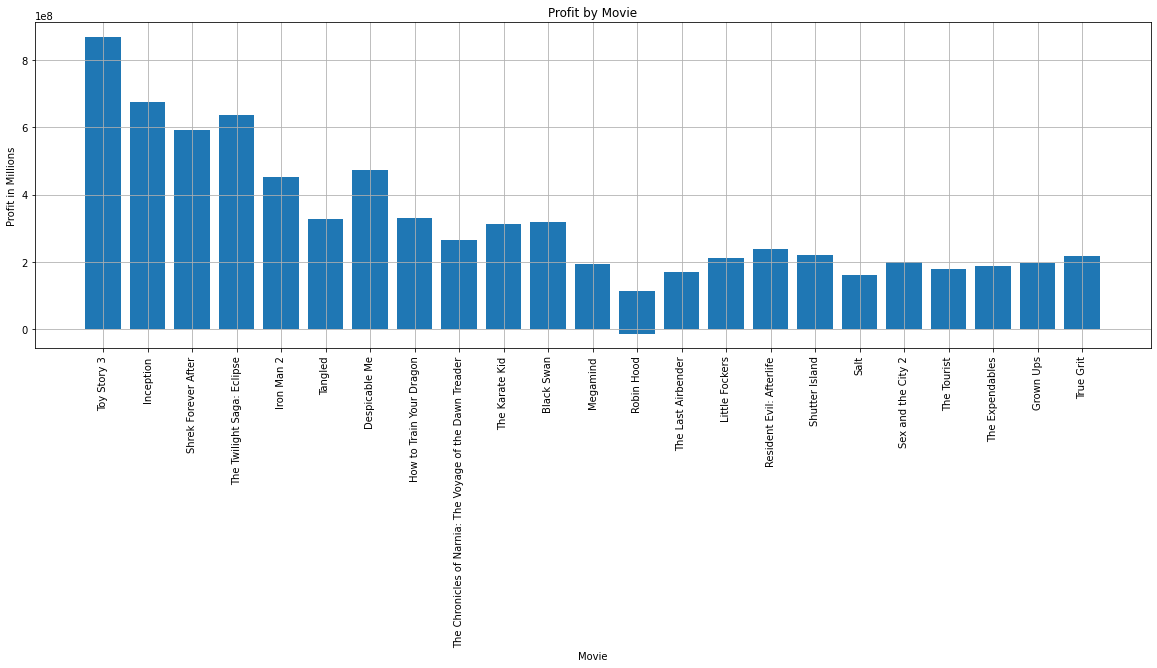

In [25]:
top = mergedProf.head(25)
plt.figure(figsize=(20,6))

plt.bar(top['movie'], top['Profit'])

plt.title('Profit by Movie')
plt.xlabel('Movie')
plt.ylabel('Profit in Millions')

plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [26]:
movie_info_df_sort = movie_info_df.sort_values(by = 'id', ascending = True)
movie_info_df_sort.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
mergedProf_sorted = mergedProf.sort_values(by='id', ascending = True)
mergedProf_sorted.head()

,movie,studio,year,id,release_date,production_budget,worldwide_gross,Profit
991,Blair Witch,LGF,2016,1,"Sep 16, 2016",10000000,38985577,28985577
175,The Tempest,Mira.,2010,1,"Dec 10, 2010",20000000,277943,-19722057
312,Winter in Wartime,SPC,2011,1,"Mar 18, 2011",5800000,9662214,3862214
671,Dumb and Dumber To,Uni.,2014,1,"Nov 14, 2014",40000000,156553592,116553592
744,Mommy,RAtt.,2014,1,"Jan 23, 2015",4900000,17536004,12636004


In [28]:
mergedProf = pd.merge(mergedProf,movies_df, on = 'movie')

In [29]:
top_pop=mergedProf.head(20)

In [30]:
top_pop

,movie,studio,year,id_x,release_date_x,production_budget,worldwide_gross,Profit,genre_ids,id_y,original_language,original_title,popularity,release_date_y,vote_average,vote_count
0,Toy Story 3,BV,2010,47,"Jun 18, 2010",200000000,1068879522,868879522,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,2010,38,"Jul 16, 2010",160000000,835524642,675524642,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,2010,27,"May 21, 2010",165000000,756244673,591244673,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,2010,53,"Jun 30, 2010",68000000,706102828,638102828,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,2010,15,"May 7, 2010",170000000,621156389,451156389,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
5,Tangled,BV,2010,15,"Nov 24, 2010",260000000,586477240,326477240,"[16, 10751]",38757,en,Tangled,21.511,2010-11-24,7.5,6407
6,Despicable Me,Uni.,2010,50,"Jul 9, 2010",69000000,543464573,474464573,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,7.2,10057
7,How to Train Your Dragon,P/DW,2010,30,"Mar 26, 2010",165000000,494870992,329870992,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,2010,48,"Dec 10, 2010",155000000,418186950,263186950,"[12, 10751, 14]",10140,en,The Chronicles of Narnia: The Voyage of the Da...,17.382,2010-12-10,6.3,3196
9,The Karate Kid,Sony,2010,77,"Jun 11, 2010",40000000,351774938,311774938,"[28, 12, 18, 10751]",38575,en,The Karate Kid,12.256,2010-06-10,6.3,3140


In [31]:
mergedProf = mergedProf.drop_duplicates(subset='movie', keep='first')

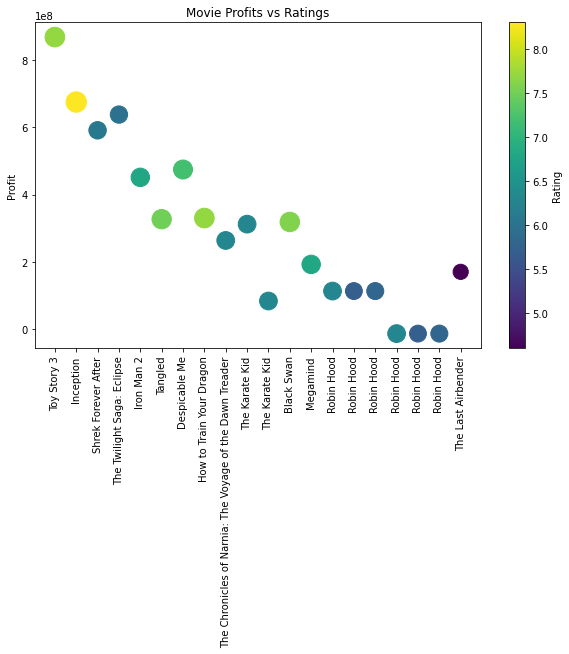

In [33]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(top_pop.index,top_pop['Profit'],c=top_pop['vote_average'], s= top_pop['vote_average']*50, cmap='viridis')
plt.colorbar(scatter, label = 'Rating')
plt.xticks(top_pop.index, top_pop['movie'], rotation = 90)
plt.ylabel('Profit')
plt.title('Movie Profits vs Ratings')
plt.show()

In [34]:
movie_runtime_data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [35]:
movie_runtime_data.rename(columns={'primary_title':'movie'}, inplace= True)

In [36]:
mergedProf = pd.merge(mergedProf,movie_runtime_data, on = 'movie')

In [37]:
mergedProf

,movie,studio,year,id_x,release_date_x,production_budget,worldwide_gross,Profit,genre_ids,id_y,...,original_title_x,popularity,release_date_y,vote_average,vote_count,movie_id,original_title_y,start_year,runtime_minutes,genres
0,Toy Story 3,BV,2010,47,"Jun 18, 2010",200000000,1068879522,868879522,"[16, 10751, 35]",10193,...,Toy Story 3,24.445,2010-06-17,7.7,8340,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy"
1,Inception,WB,2010,38,"Jul 16, 2010",160000000,835524642,675524642,"[28, 878, 12]",27205,...,Inception,27.920,2010-07-16,8.3,22186,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,2010,27,"May 21, 2010",165000000,756244673,591244673,"[35, 12, 14, 16, 10751]",10192,...,Shrek Forever After,15.041,2010-05-16,6.1,3843,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,2010,53,"Jun 30, 2010",68000000,706102828,638102828,"[12, 14, 18, 10749]",24021,...,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,2010,15,"May 7, 2010",170000000,621156389,451156389,"[12, 28, 878]",10138,...,Iron Man 2,28.515,2010-05-07,6.8,12368,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Gotti,VE,2018,64,"Jun 15, 2018",10000000,6089100,-3910900,"[80, 18, 36, 53]",339103,...,Gotti,10.034,2018-06-15,5.2,231,tt1801552,Gotti,2018,112.0,"Biography,Crime,Drama"
1551,Bilal: A New Breed of Hero,VE,2018,100,"Feb 2, 2018",30000000,648599,-29351401,"[28, 12, 16]",332718,...,Bilal: A New Breed of Hero,2.707,2018-02-02,6.8,54,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation"
1552,Mandy,RLJ,2018,71,"Sep 14, 2018",6000000,1427656,-4572344,[18],499658,...,Mandy,0.600,2016-01-24,3.5,2,tt4995858,Mandy,2016,113.0,"Drama,Thriller"
1553,Mandy,RLJ,2018,71,"Sep 14, 2018",6000000,1427656,-4572344,[18],499658,...,Mandy,0.600,2016-01-24,3.5,2,tt6998518,Mandy,2018,121.0,"Action,Fantasy,Horror"


In [38]:
length_prof = mergedProf.drop_duplicates(subset='movie', keep='first')
length_prof = length_prof.reset_index(drop=True)
length_prof = length_prof.head(25)

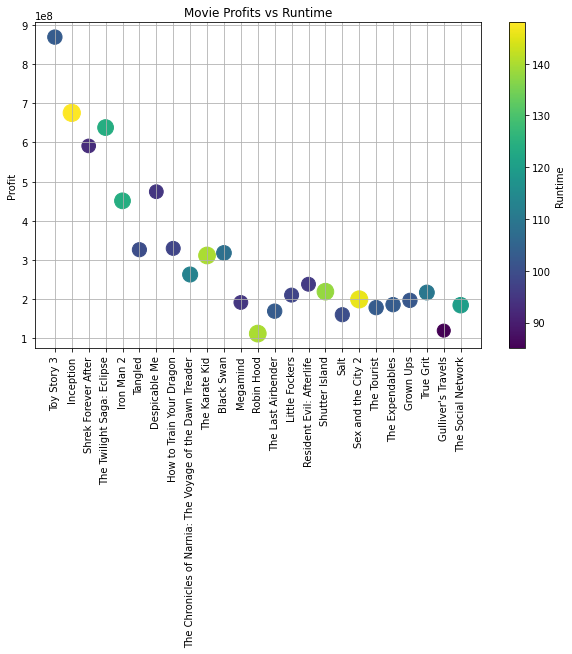

In [39]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(length_prof.index,length_prof['Profit'],c=length_prof['runtime_minutes'], s= length_prof['runtime_minutes']*2, cmap='viridis')
plt.colorbar(scatter, label = 'Runtime')
plt.xticks(length_prof.index, length_prof['movie'], rotation = 90)
plt.ylabel('Profit')
plt.title('Movie Profits vs Runtime')
plt.grid(True)
plt.show()